In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Importing additional libraries
from pmdarima.arima import auto_arima
from pmdarima import model_selection

In [2]:
# Loading of the dataset
df = pd.read_csv('C:\\Users\\suraj\\Downloads\\CoronaVirus Data.csv')
df


,0,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily
0,0,Afghanistan,Afghanistan,33.93911,67.709953,22-01-2020,0,0,0,Jan-20,0,0,0
1,1,Albania,Albania,41.1533,20.1683,22-01-2020,0,0,0,Jan-20,0,0,0
2,2,Algeria,Algeria,28.0339,1.6596,22-01-2020,0,0,0,Jan-20,0,0,0
3,3,Andorra,Andorra,42.5063,1.5218,22-01-2020,0,0,0,Jan-20,0,0,0
4,4,Angola,Angola,-11.2027,17.8739,22-01-2020,0,0,0,Jan-20,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330322,330322,West Bank and Gaza,West Bank and Gaza,31.9522,35.2332,09-03-2023,703228,5708,0,Mar-23,0,0,0
330323,330323,Winter Olympics 2022,Winter Olympics 2022,39.9042,116.4074,09-03-2023,535,0,0,Mar-23,0,0,0
330324,330324,Yemen,Yemen,15.552727,48.516388,09-03-2023,11945,2159,0,Mar-23,0,0,0
330325,330325,Zambia,Zambia,-13.133897,27.849332,09-03-2023,343135,4057,0,Mar-23,0,0,0


In [3]:
df = df.loc[df["Country/Region"].isin(["India"])]
df

,0,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily
148,148,India,India,20.593684,78.96288,22-01-2020,0,0,0,Jan-20,0,0,0
437,437,India,India,20.593684,78.96288,23-01-2020,0,0,0,Jan-20,0,0,0
726,726,India,India,20.593684,78.96288,24-01-2020,0,0,0,Jan-20,0,0,0
1015,1015,India,India,20.593684,78.96288,25-01-2020,0,0,0,Jan-20,0,0,0
1304,1304,India,India,20.593684,78.96288,26-01-2020,0,0,0,Jan-20,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329030,329030,India,India,20.593684,78.96288,05-03-2023,44689327,530775,0,Mar-23,281,0,0
329319,329319,India,India,20.593684,78.96288,06-03-2023,44689593,530775,0,Mar-23,266,0,0
329608,329608,India,India,20.593684,78.96288,07-03-2023,44689919,530775,0,Mar-23,326,0,0
329897,329897,India,India,20.593684,78.96288,08-03-2023,44690298,530776,0,Mar-23,379,1,0


In [4]:
# Converted 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)


C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\1902484484.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\1902484484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [5]:
df = df[["Country/Region","Confirmed"]]
df

,Country/Region,Confirmed
Date,,
2020-01-22,India,0
2020-01-23,India,0
2020-01-24,India,0
2020-01-25,India,0
2020-01-26,India,0
...,...,...
2023-03-05,India,44689327
2023-03-06,India,44689593
2023-03-07,India,44689919


In [6]:
# Checking the missing values
df.dropna(inplace=True)

C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\3292067193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


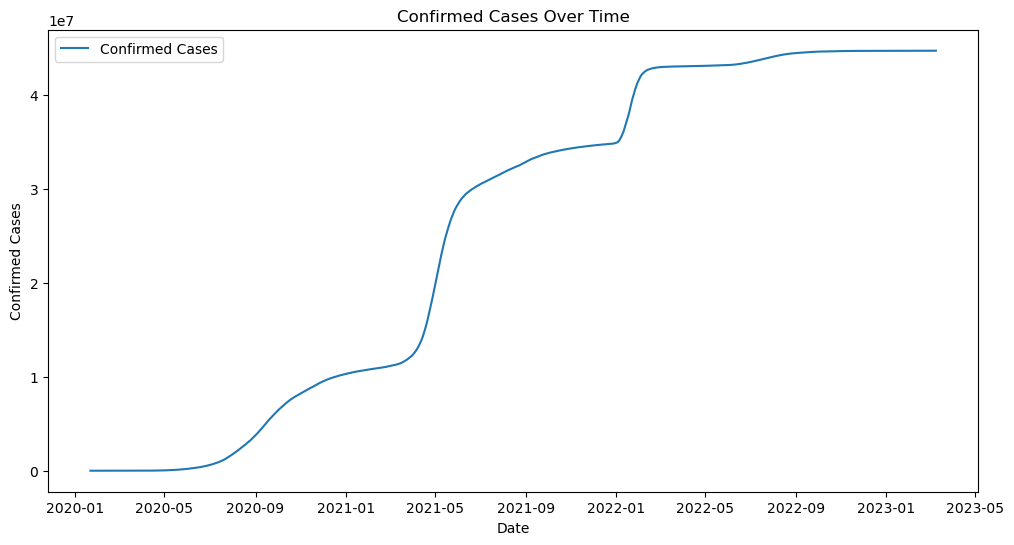

In [7]:
# Plotted the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Confirmed'], label='Confirmed Cases')
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
test_result=adfuller(df['Confirmed'])

In [10]:
#To check Data is Stationary or not
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Confirmed):
    result=adfuller(Confirmed)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(df['Confirmed'])

ADF Test Statistic : -1.2689949849829405
p-value : 0.6432351193694003
#Lags Used : 22
Number of Observations Used : 1120
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
df['confirmedC'] = df['Confirmed'] - df['Confirmed'].shift(1)

C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\3987107244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['confirmedC'] = df['Confirmed'] - df['Confirmed'].shift(1)


In [13]:
df['Confirmed'].shift(1)

Date
2020-01-22           NaN
2020-01-23           0.0
2020-01-24           0.0
2020-01-25           0.0
2020-01-26           0.0
                 ...    
2023-03-05    44689046.0
2023-03-06    44689327.0
2023-03-07    44689593.0
2023-03-08    44689919.0
2023-03-09    44690298.0
Name: Confirmed, Length: 1143, dtype: float64

In [14]:
df['confirmedC']=df['Confirmed']-df['Confirmed'].shift(12)

C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\2248477167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['confirmedC']=df['Confirmed']-df['Confirmed'].shift(12)


In [15]:
df['confirmedC']=df['Confirmed']-df['Confirmed'].shift(12)

C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\2248477167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['confirmedC']=df['Confirmed']-df['Confirmed'].shift(12)


In [16]:
df.tail(10)

,Country/Region,Confirmed,confirmedC
Date,,,
2023-02-28,India,44687837,1953.0
2023-03-01,India,44688105,2104.0
2023-03-02,India,44688388,2245.0
2023-03-03,India,44688722,2459.0
2023-03-04,India,44689046,2688.0
2023-03-05,India,44689327,2844.0
2023-03-06,India,44689593,2917.0
2023-03-07,India,44689919,3077.0
2023-03-08,India,44690298,3273.0


In [17]:
## Again tested dickey fuller test
adfuller_test(df['confirmedC'].dropna())

ADF Test Statistic : -3.8418370936873085
p-value : 0.002507130396570977
#Lags Used : 23
Number of Observations Used : 1107
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

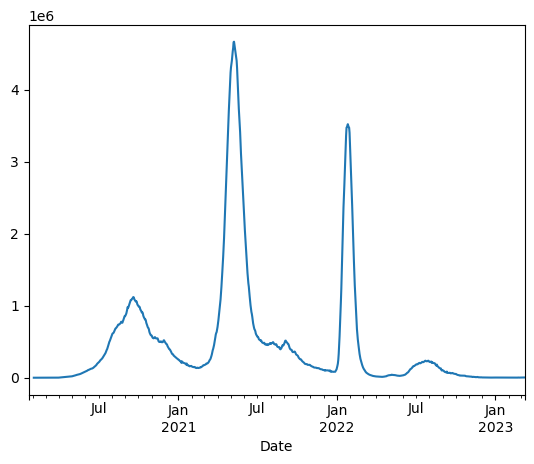

In [18]:
df['confirmedC'].plot()

In [19]:
# Splitted the data into training and testing sets based on the specified date range
train = df['2020-01-22':'2023-01-09']
test = df['2023-01-10':]


In [20]:
df_diff = df['confirmedC'].diff().dropna()

In [21]:
df['confirmedC'].interpolate(inplace=True)

C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\3165853192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['confirmedC'].interpolate(inplace=True)


In [22]:
# Checking the missing values
print(train['confirmedC'].isnull().sum())


12


In [23]:
# Dropping the rows with missing values for 'confirmedC'
train.dropna(subset=['confirmedC'], inplace=True)



C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\3776865302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(subset=['confirmedC'], inplace=True)


In [24]:
print(train['confirmedC'].isnull().sum())

0


In [25]:
# Auto ARIMA model
auto_arima_model = auto_arima(train['confirmedC'], seasonal=True, m=12, trace=True)
arima_order = auto_arima_model.get_params()['order']


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=6.87 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=25933.861, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=22713.636, Time=0.93 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=3.02 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=25931.861, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=22963.982, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=22632.447, Time=3.90 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=13.96 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=22282.461, Time=5.26 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=6.15 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=18.18 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=inf, Time=12.71 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=18.89 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=25598.027, Time=0.63 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=

In [26]:
arima_order = (2,1,0)

model_arima = ARIMA(train['confirmedC'], order=arima_order)
results_arima = model_arima.fit()

C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [27]:
arima_predictions = results_arima.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [28]:
# Auto SARIMA model
auto_sarima_model = auto_arima(train['confirmedC'], seasonal=True, m=12, trace=True)
sarima_order = auto_sarima_model.get_params()['order']
sarima_seasonal_order = auto_sarima_model.get_params()['seasonal_order']

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=6.92 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=25933.861, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=22713.636, Time=0.92 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=25931.861, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=22963.982, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=22632.447, Time=3.83 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=13.86 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=22282.461, Time=5.45 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=6.20 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=18.37 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=inf, Time=12.22 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=17.57 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=25598.027, Time=0.61 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=

In [29]:
# Built the SARIMA model using the auto SARIMA order
model_sarima = SARIMAX(train['confirmedC'], order=sarima_order, seasonal_order=sarima_seasonal_order)
results_sarima = model_sarima.fit()

C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [30]:
# Predicted using SARIMA model
sarima_predictions = results_sarima.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')


C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [31]:
# Evaluated all the models
print('ARIMA RMSE:', np.sqrt(mean_squared_error(test['confirmedC'], arima_predictions)))
print('SARIMA RMSE:', np.sqrt(mean_squared_error(test['confirmedC'], sarima_predictions)))


ARIMA RMSE: 2272.959877385589
SARIMA RMSE: 721.4781331444572


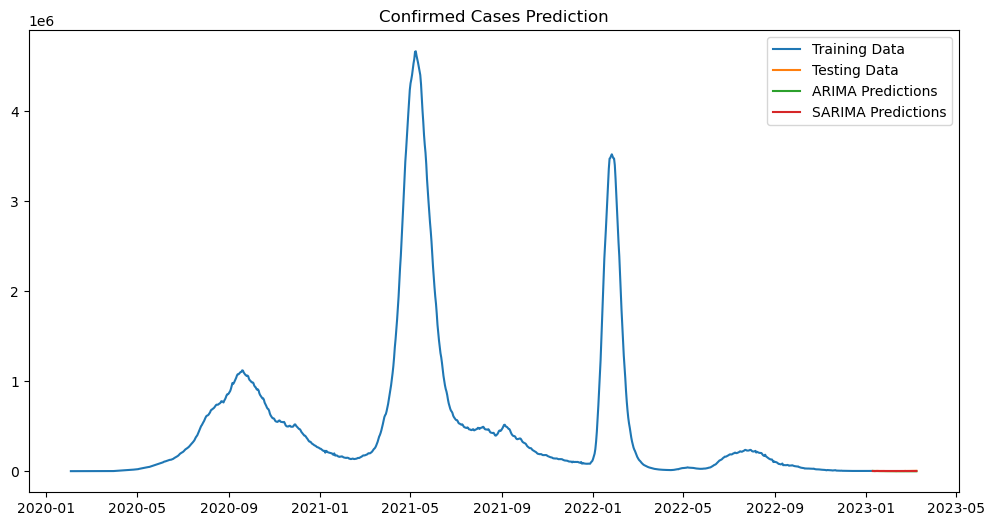

In [32]:
# Plotted the results
plt.figure(figsize=(12, 6))
plt.plot(train['confirmedC'], label='Training Data')
plt.plot(test['confirmedC'], label='Testing Data')
plt.plot(test.index, arima_predictions, label='ARIMA Predictions')
plt.plot(test.index, sarima_predictions, label='SARIMA Predictions')
plt.legend()
plt.title('Confirmed Cases Prediction')
plt.show()


In [33]:
# ARIMA model summary
print(results_arima.summary())

# SARIMA model summary
print(results_sarima.summary())


                               SARIMAX Results                                
Dep. Variable:             confirmedC   No. Observations:                 1072
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -11474.310
Date:                Fri, 02 Feb 2024   AIC                          22954.620
Time:                        16:44:58   BIC                          22969.550
Sample:                    02-03-2020   HQIC                         22960.276
                         - 01-09-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0586      0.011     97.785      0.000       1.037       1.080
ar.L2         -0.0933      0.010     -8.960      0.000      -0.114      -0.073
sigma2      1.186e+08   3.55e-11   3.34e+18      0.0

In [34]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse_arima = mean_squared_error(test['confirmedC'], arima_predictions)
mse_sarima = mean_squared_error(test['confirmedC'], sarima_predictions)

# Calculate RMSE
rmse_arima = np.sqrt(mse_arima)
rmse_sarima = np.sqrt(mse_sarima)

print('ARIMA RMSE:', rmse_arima)
print('SARIMA RMSE:', rmse_sarima)


ARIMA RMSE: 2272.959877385589
SARIMA RMSE: 721.4781331444572


In [35]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae_arima = mean_absolute_error(test['confirmedC'], arima_predictions)
mae_sarima = mean_absolute_error(test['confirmedC'], sarima_predictions)

print('ARIMA MAE:', mae_arima)
print('SARIMA MAE:', mae_sarima)


ARIMA MAE: 1916.6460992388215
SARIMA MAE: 606.4738216025896


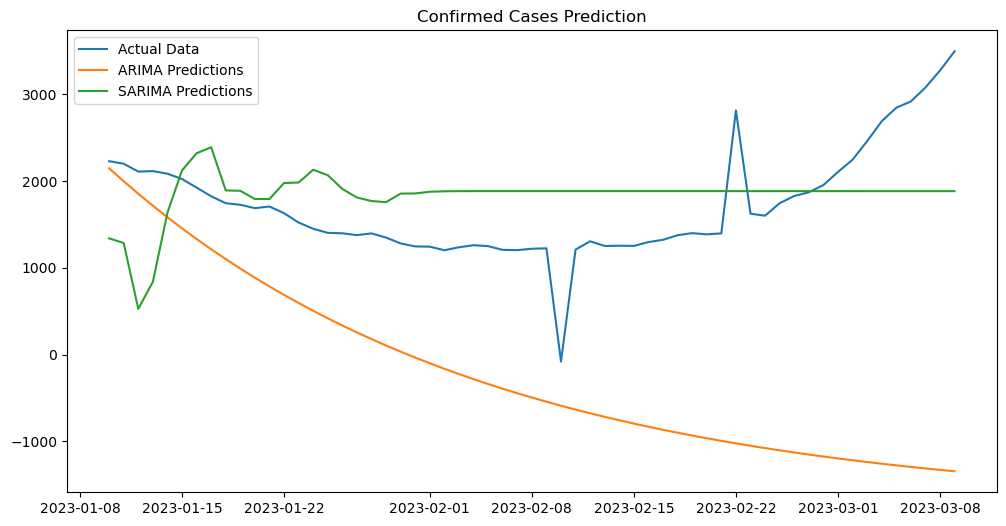

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(test['confirmedC'], label='Actual Data')
plt.plot(test.index, arima_predictions, label='ARIMA Predictions')
plt.plot(test.index, sarima_predictions, label='SARIMA Predictions')
plt.legend()
plt.title('Confirmed Cases Prediction')
plt.show()


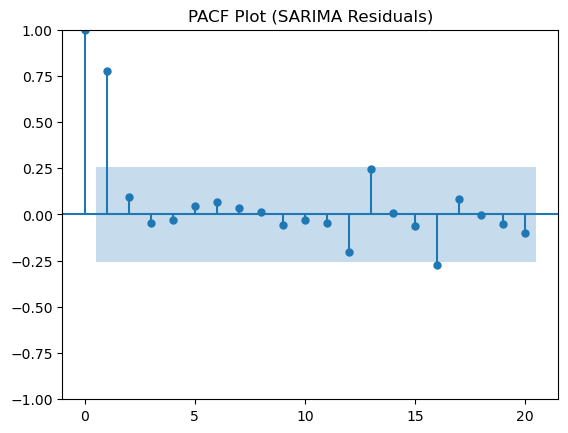

<Figure size 1200x600 with 0 Axes>

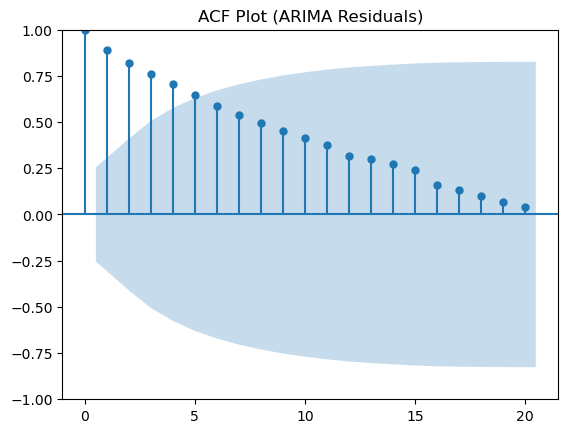

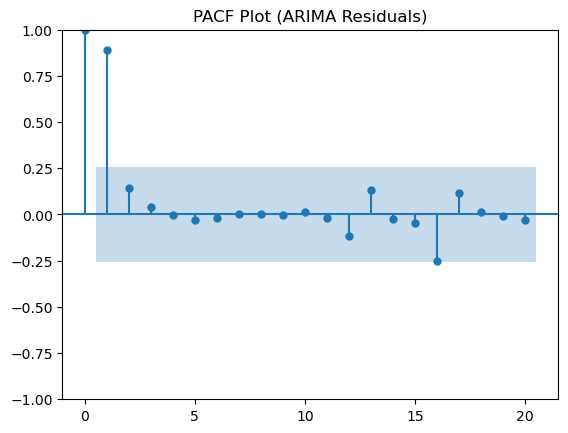

<Figure size 1200x600 with 0 Axes>

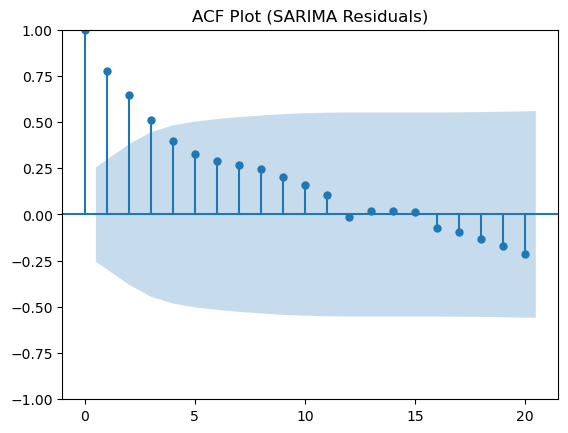

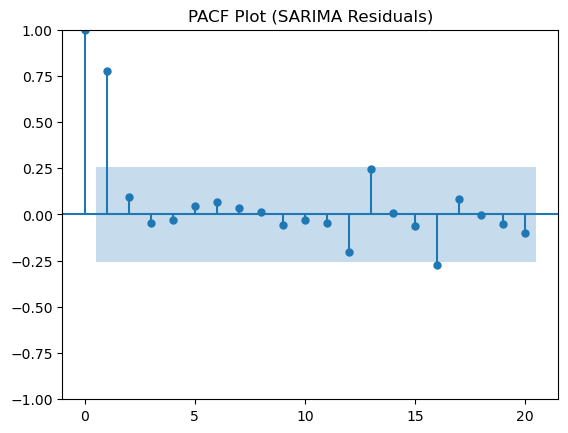

In [37]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for residuals
residuals_arima = test['confirmedC'] - arima_predictions
residuals_sarima = test['confirmedC'] - sarima_predictions

plt.figure(figsize=(12, 6))
plot_acf(residuals_arima, lags=20, title='ACF Plot (ARIMA Residuals)')
plot_pacf(residuals_arima, lags=20, title='PACF Plot (ARIMA Residuals)')

plt.figure(figsize=(12, 6))
plot_acf(residuals_sarima, lags=20, title='ACF Plot (SARIMA Residuals)')
plot_pacf(residuals_sarima, lags=20, title='PACF Plot (SARIMA Residuals)')


In [38]:
from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test for stationarity
result_arima = adfuller(residuals_arima)
result_sarima = adfuller(residuals_sarima)

print('ARIMA Residuals Stationarity p-value:', result_arima[1])
print('SARIMA Residuals Stationarity p-value:', result_sarima[1])


ARIMA Residuals Stationarity p-value: 0.9988946043732361
SARIMA Residuals Stationarity p-value: 0.9956492255172051


In [39]:
# Calculate residuals
residuals_arima = test['confirmedC'] - arima_predictions
residuals_sarima = test['confirmedC'] - sarima_predictions

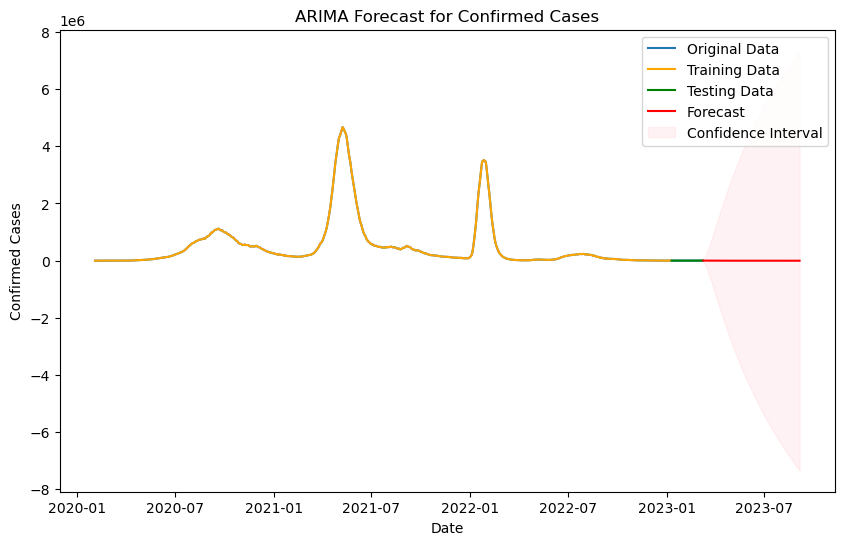

In [40]:
# predictions for the next 6 months (180 days)
forecast_steps = 180
forecast_arima = results_arima.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast_arima.predicted_mean
confidence_intervals = forecast_arima.conf_int()

# Created a datetime index for the forecast period
forecast_index = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Created a DataFrame to store the forecast results
forecast_df = pd.DataFrame(index=forecast_index)
forecast_df['Forecast'] = forecast_values.values
forecast_df['Lower_CI'] = confidence_intervals.iloc[:, 0].values
forecast_df['Upper_CI'] = confidence_intervals.iloc[:, 1].values

# Plotted the original data, training data, and forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['confirmedC'], label='Original Data')
plt.plot(train.index, train['confirmedC'], label='Training Data', color='orange')
plt.plot(test.index, test['confirmedC'], label='Testing Data', color='green')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.2, label='Confidence Interval')
plt.title('ARIMA Forecast for Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()


In [41]:
# Loading of the dataset
df = pd.read_csv('C:\\Users\\suraj\\Downloads\\CoronaVirus Data.csv')
df

,0,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily
0,0,Afghanistan,Afghanistan,33.93911,67.709953,22-01-2020,0,0,0,Jan-20,0,0,0
1,1,Albania,Albania,41.1533,20.1683,22-01-2020,0,0,0,Jan-20,0,0,0
2,2,Algeria,Algeria,28.0339,1.6596,22-01-2020,0,0,0,Jan-20,0,0,0
3,3,Andorra,Andorra,42.5063,1.5218,22-01-2020,0,0,0,Jan-20,0,0,0
4,4,Angola,Angola,-11.2027,17.8739,22-01-2020,0,0,0,Jan-20,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330322,330322,West Bank and Gaza,West Bank and Gaza,31.9522,35.2332,09-03-2023,703228,5708,0,Mar-23,0,0,0
330323,330323,Winter Olympics 2022,Winter Olympics 2022,39.9042,116.4074,09-03-2023,535,0,0,Mar-23,0,0,0
330324,330324,Yemen,Yemen,15.552727,48.516388,09-03-2023,11945,2159,0,Mar-23,0,0,0
330325,330325,Zambia,Zambia,-13.133897,27.849332,09-03-2023,343135,4057,0,Mar-23,0,0,0


In [42]:
df = df.loc[df["Country/Region"].isin(["India"])]
df

,0,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily
148,148,India,India,20.593684,78.96288,22-01-2020,0,0,0,Jan-20,0,0,0
437,437,India,India,20.593684,78.96288,23-01-2020,0,0,0,Jan-20,0,0,0
726,726,India,India,20.593684,78.96288,24-01-2020,0,0,0,Jan-20,0,0,0
1015,1015,India,India,20.593684,78.96288,25-01-2020,0,0,0,Jan-20,0,0,0
1304,1304,India,India,20.593684,78.96288,26-01-2020,0,0,0,Jan-20,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329030,329030,India,India,20.593684,78.96288,05-03-2023,44689327,530775,0,Mar-23,281,0,0
329319,329319,India,India,20.593684,78.96288,06-03-2023,44689593,530775,0,Mar-23,266,0,0
329608,329608,India,India,20.593684,78.96288,07-03-2023,44689919,530775,0,Mar-23,326,0,0
329897,329897,India,India,20.593684,78.96288,08-03-2023,44690298,530776,0,Mar-23,379,1,0


In [43]:
# Converted 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\2540806177.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\2540806177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [44]:
df = df[["Country/Region","Deaths"]]
df

,Country/Region,Deaths
Date,,
2020-01-22,India,0
2020-01-23,India,0
2020-01-24,India,0
2020-01-25,India,0
2020-01-26,India,0
...,...,...
2023-03-05,India,530775
2023-03-06,India,530775
2023-03-07,India,530775


In [45]:
# Checking the missing values
df.dropna(inplace=True)

C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\3292067193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


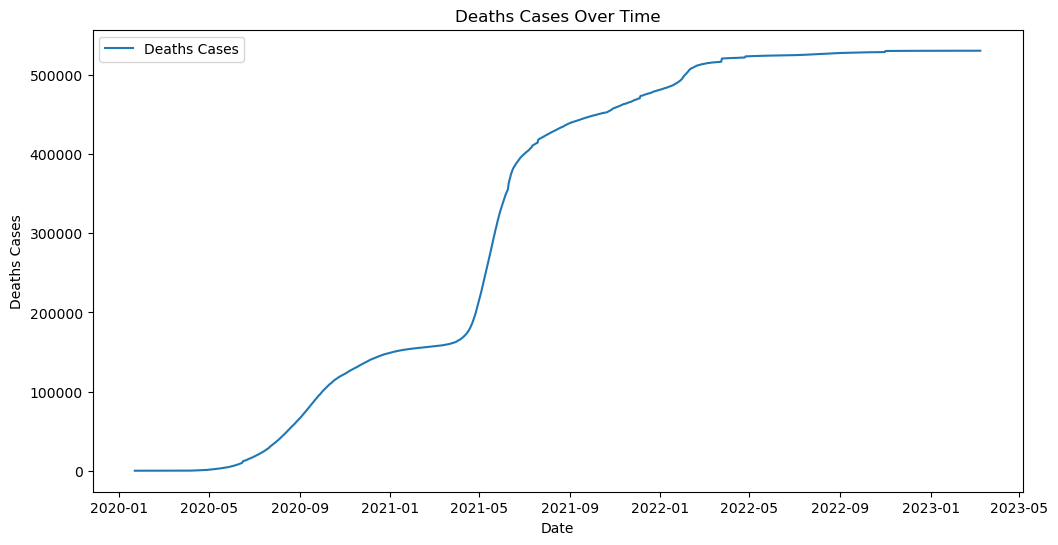

In [46]:
# Plotted the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Deaths'], label='Deaths Cases')
plt.title('Deaths Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Deaths Cases')
plt.legend()
plt.show()

In [47]:
from statsmodels.tsa.stattools import adfuller

In [48]:
test_result=adfuller(df['Deaths'])

In [49]:
#To check Data is Stationary or not
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Deaths):
    result=adfuller(Deaths)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [50]:
adfuller_test(df['Deaths'])

ADF Test Statistic : -1.671723798542578
p-value : 0.44573693351683674
#Lags Used : 8
Number of Observations Used : 1134
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [51]:
df['DeathsD'] = df['Deaths'] - df['Deaths'].shift(1)

C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\505861262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DeathsD'] = df['Deaths'] - df['Deaths'].shift(1)


In [52]:
df['Deaths'].shift(1)

Date
2020-01-22         NaN
2020-01-23         0.0
2020-01-24         0.0
2020-01-25         0.0
2020-01-26         0.0
                ...   
2023-03-05    530775.0
2023-03-06    530775.0
2023-03-07    530775.0
2023-03-08    530775.0
2023-03-09    530776.0
Name: Deaths, Length: 1143, dtype: float64

In [53]:
df['DeathsD']=df['Deaths']-df['Deaths'].shift(12)

C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\622570098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DeathsD']=df['Deaths']-df['Deaths'].shift(12)


In [54]:
df.tail(10)

,Country/Region,Deaths,DeathsD
Date,,,
2023-02-28,India,530772,15.0
2023-03-01,India,530772,15.0
2023-03-02,India,530772,12.0
2023-03-03,India,530775,14.0
2023-03-04,India,530775,14.0
2023-03-05,India,530775,13.0
2023-03-06,India,530775,12.0
2023-03-07,India,530775,11.0
2023-03-08,India,530776,12.0


In [55]:
## Again tested dickey fuller test
adfuller_test(df['DeathsD'].dropna())

ADF Test Statistic : -4.00040694116845
p-value : 0.0014083818881067943
#Lags Used : 18
Number of Observations Used : 1112
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

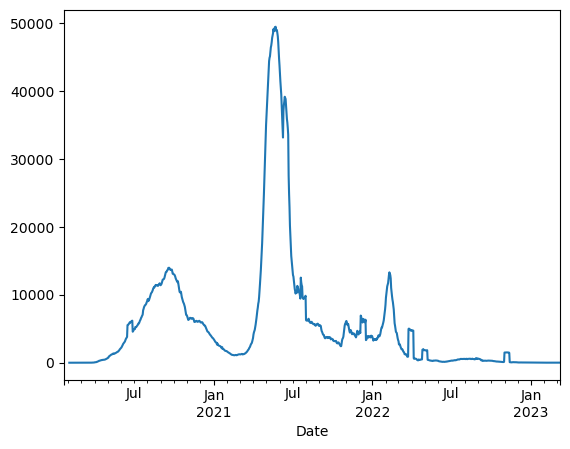

In [56]:
df['DeathsD'].plot()

In [57]:
# Splitted the data into training and testing sets based on the specified date range
train = df['2020-01-22':'2023-01-09']
test = df['2023-01-10':]

In [58]:
df_diff = df['DeathsD'].diff().dropna()

In [59]:
df['DeathsD'].interpolate(inplace=True)

C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\782579777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DeathsD'].interpolate(inplace=True)


In [60]:
# Checking the missing values
print(train['DeathsD'].isnull().sum())

12


In [61]:
# Dropping the rows with missing values for 'confirmedC'
train.dropna(subset=['DeathsD'], inplace=True)


C:\Users\suraj\AppData\Local\Temp\ipykernel_4320\2182674996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(subset=['DeathsD'], inplace=True)


In [62]:
print(train['DeathsD'].isnull().sum())

0


In [63]:
# Auto ARIMA model
auto_arima_model = auto_arima(train['DeathsD'], seasonal=True, m=12, trace=True)
arima_order = auto_arima_model.get_params()['order']


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=5.26 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=16411.914, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=15939.753, Time=0.85 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=16169.053, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=16409.915, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=16123.878, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=15882.336, Time=3.29 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=8.58 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.50 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=16399.143, Time=0.67 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=15714.621, Time=5.59 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=15802.813, Time=1.45 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=9.51 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.19 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept 

In [64]:
arima_order = (5,1,1)

model_arima = ARIMA(train['DeathsD'], order=arima_order)
results_arima = model_arima.fit()

C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [65]:
arima_predictions = results_arima.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [66]:
# Auto SARIMA model
auto_sarima_model = auto_arima(train['DeathsD'], seasonal=True, m=12, trace=True)
sarima_order = auto_sarima_model.get_params()['order']
sarima_seasonal_order = auto_sarima_model.get_params()['seasonal_order']

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=5.84 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=16411.914, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=15939.753, Time=0.86 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=16169.053, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=16409.915, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=16123.878, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=15882.336, Time=3.17 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=8.67 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=16399.143, Time=0.71 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=15714.621, Time=5.36 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=15802.813, Time=1.36 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=9.62 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.17 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept 

In [67]:
# Built the SARIMA model using the auto SARIMA order
model_sarima = SARIMAX(train['DeathsD'], order=sarima_order, seasonal_order=sarima_seasonal_order)
results_sarima = model_sarima.fit()

C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
# Predicted using SARIMA model
sarima_predictions = results_sarima.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

C:\Users\suraj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [69]:
# Evaluated all the models
print('ARIMA RMSE:', np.sqrt(mean_squared_error(test['DeathsD'], arima_predictions)))
print('SARIMA RMSE:', np.sqrt(mean_squared_error(test['DeathsD'], sarima_predictions)))

ARIMA RMSE: 13.438649614630231
SARIMA RMSE: 10.635823415662575


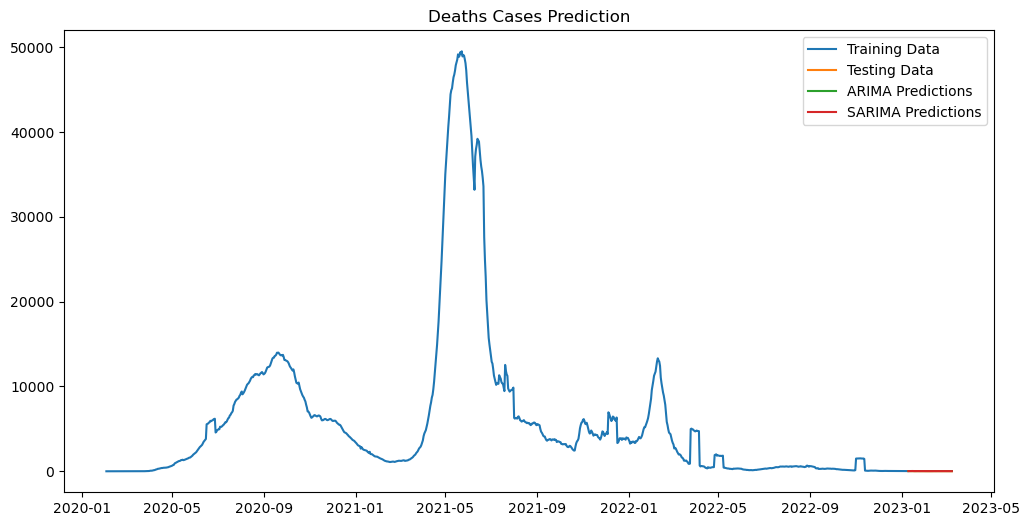

In [70]:
# Plotted the results
plt.figure(figsize=(12, 6))
plt.plot(train['DeathsD'], label='Training Data')
plt.plot(test['DeathsD'], label='Testing Data')
plt.plot(test.index, arima_predictions, label='ARIMA Predictions')
plt.plot(test.index, sarima_predictions, label='SARIMA Predictions')
plt.legend()
plt.title('Deaths Cases Prediction')
plt.show()


In [71]:
# ARIMA model summary
print(results_arima.summary())

# SARIMA model summary
print(results_sarima.summary())

                               SARIMAX Results                                
Dep. Variable:                DeathsD   No. Observations:                 1072
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -7989.962
Date:                Fri, 02 Feb 2024   AIC                          15993.923
Time:                        17:00:20   BIC                          16028.758
Sample:                    02-03-2020   HQIC                         16007.119
                         - 01-09-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8026      0.136      5.888      0.000       0.535       1.070
ar.L2          0.0120      0.048      0.247      0.805      -0.083       0.107
ar.L3          0.0590      0.041      1.434      0.1

In [72]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse_arima = mean_squared_error(test['DeathsD'], arima_predictions)
mse_sarima = mean_squared_error(test['DeathsD'], sarima_predictions)

# Calculate RMSE
rmse_arima = np.sqrt(mse_arima)
rmse_sarima = np.sqrt(mse_sarima)

print('ARIMA RMSE:', rmse_arima)
print('SARIMA RMSE:', rmse_sarima)


ARIMA RMSE: 13.438649614630231
SARIMA RMSE: 10.635823415662575


In [73]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae_arima = mean_absolute_error(test['DeathsD'], arima_predictions)
mae_sarima = mean_absolute_error(test['DeathsD'], sarima_predictions)

print('ARIMA MAE:', mae_arima)
print('SARIMA MAE:', mae_sarima)


ARIMA MAE: 12.932235446031092
SARIMA MAE: 10.1204067710787


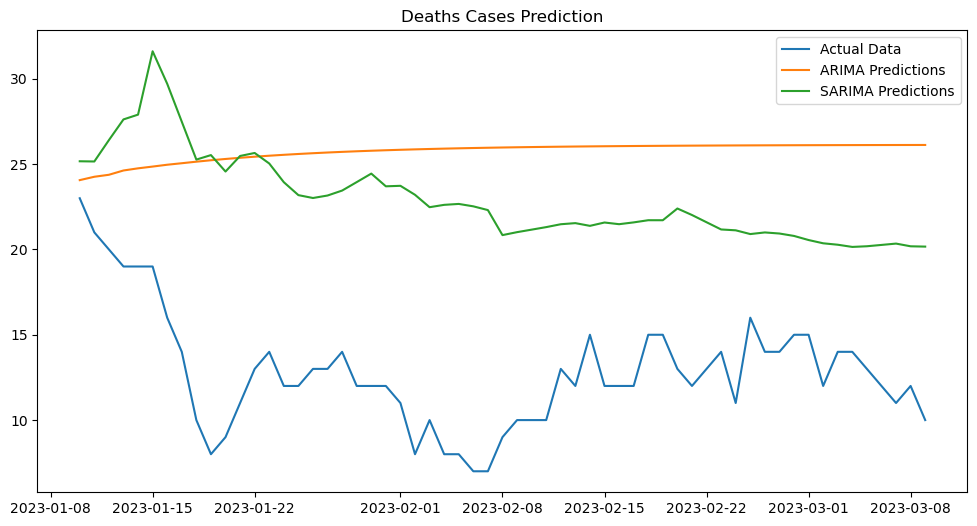

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(test['DeathsD'], label='Actual Data')
plt.plot(test.index, arima_predictions, label='ARIMA Predictions')
plt.plot(test.index, sarima_predictions, label='SARIMA Predictions')
plt.legend()
plt.title('Deaths Cases Prediction')
plt.show()

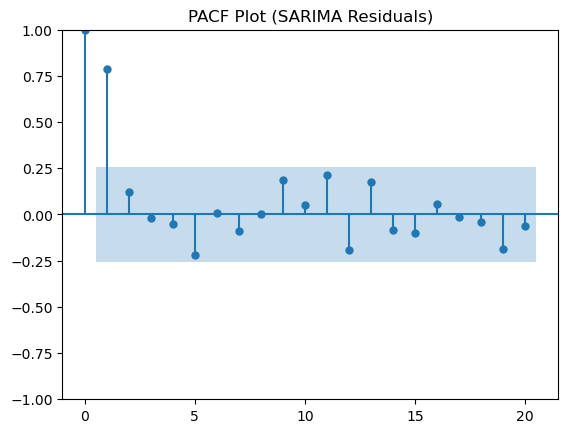

<Figure size 1200x600 with 0 Axes>

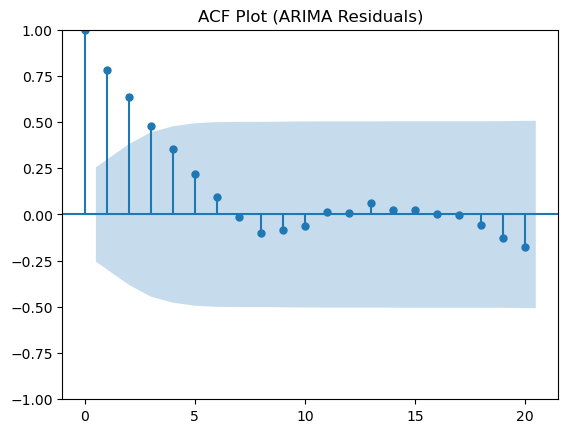

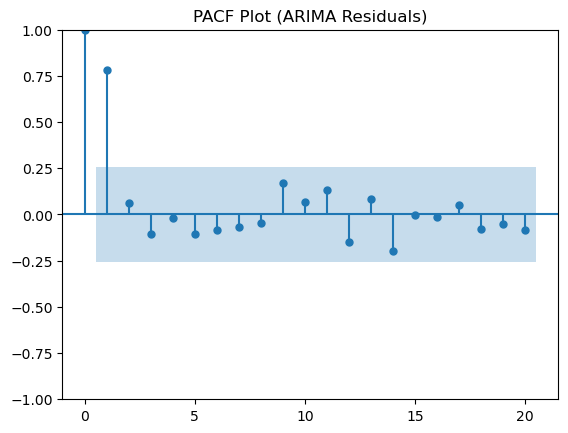

<Figure size 1200x600 with 0 Axes>

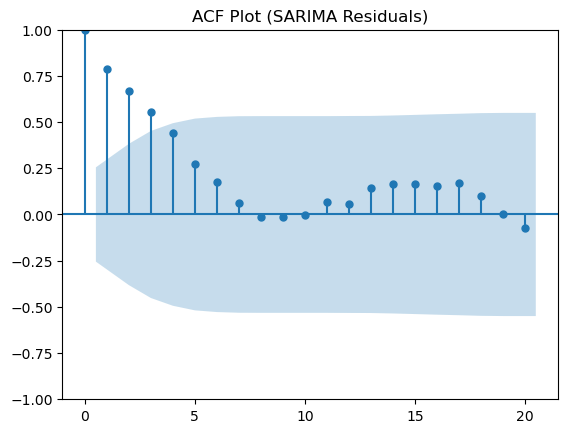

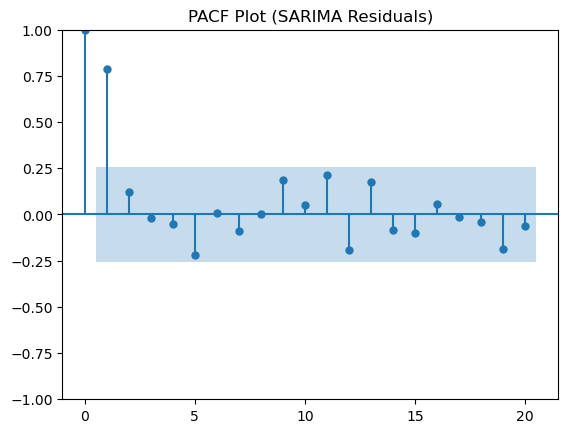

In [75]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for residuals
residuals_arima = test['DeathsD'] - arima_predictions
residuals_sarima = test['DeathsD'] - sarima_predictions

plt.figure(figsize=(12, 6))
plot_acf(residuals_arima, lags=20, title='ACF Plot (ARIMA Residuals)')
plot_pacf(residuals_arima, lags=20, title='PACF Plot (ARIMA Residuals)')

plt.figure(figsize=(12, 6))
plot_acf(residuals_sarima, lags=20, title='ACF Plot (SARIMA Residuals)')
plot_pacf(residuals_sarima, lags=20, title='PACF Plot (SARIMA Residuals)')


In [76]:
from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test for stationarity
result_arima = adfuller(residuals_arima)
result_sarima = adfuller(residuals_sarima)

print('ARIMA Residuals Stationarity p-value:', result_arima[1])
print('SARIMA Residuals Stationarity p-value:', result_sarima[1])


ARIMA Residuals Stationarity p-value: 0.021667435550548814
SARIMA Residuals Stationarity p-value: 0.11326452161407824


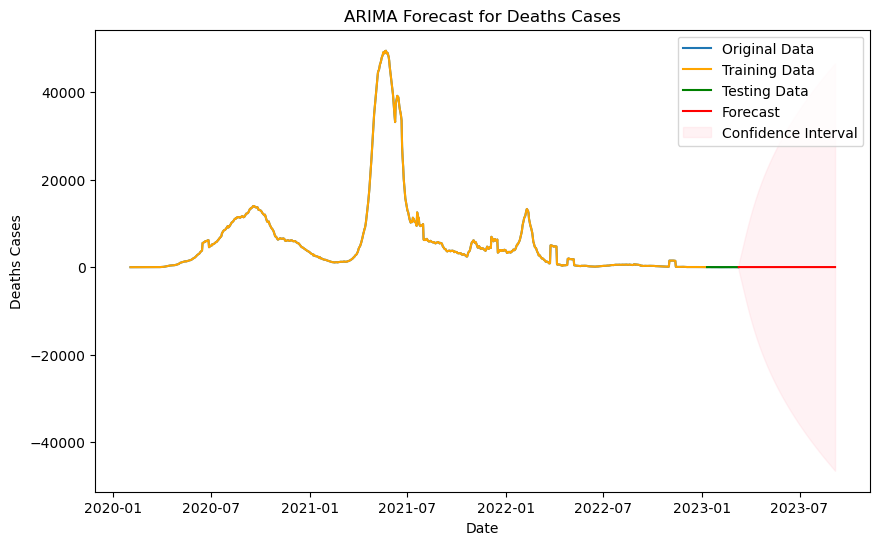

In [77]:
# predictions for the next 6 months (180 days)
forecast_steps = 180
forecast_arima = results_arima.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast_arima.predicted_mean
confidence_intervals = forecast_arima.conf_int()

# Created a datetime index for the forecast period
forecast_index = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Created a DataFrame to store the forecast results
forecast_df = pd.DataFrame(index=forecast_index)
forecast_df['Forecast'] = forecast_values.values
forecast_df['Lower_CI'] = confidence_intervals.iloc[:, 0].values
forecast_df['Upper_CI'] = confidence_intervals.iloc[:, 1].values

# Plotted the original data, training data, and forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['DeathsD'], label='Original Data')
plt.plot(train.index, train['DeathsD'], label='Training Data', color='orange')
plt.plot(test.index, test['DeathsD'], label='Testing Data', color='green')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.2, label='Confidence Interval')
plt.title('ARIMA Forecast for Deaths Cases')
plt.xlabel('Date')
plt.ylabel('Deaths Cases')
plt.legend()
plt.show()